In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy

adelen_path = "/media/abian/Extreme SSD/Thesis/Results/Chapter8/MedMNIST/ADeLEn/2/medmnist_anomalies_0.1_pollution_0.05/dropout/"
supervised_path = "/media/abian/Extreme SSD/Thesis/Results/Chapter8/MedMNIST/Supervised/medmnist_anomalies_0.1_pollution_0.05/dropout/"

In [2]:
adelen = pd.read_pickle(adelen_path + "fpr_tpr.pkl")
supervised = pd.read_pickle(supervised_path + "fpr_tpr.pkl")

In [3]:
roc_adelen = pd.read_csv(adelen_path + "roc_auc.csv", index_col=0)
roc_supervised = pd.read_csv(supervised_path + "roc_auc.csv", index_col=0)

In [5]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# roc_auc = auc(fpr, tpr)
adelen_roc_mean = roc_adelen.mean().values[0]

# find the fpr y tpr which value is closer to the mean roc_auc
adelen_fpr = adelen["fpr"].values
adelen_tpr = adelen["tpr"].values
max_idx, closed_value = -1, 10000
for i in range(len(adelen_fpr)):
    fpr, tpr = adelen_fpr[i], adelen_tpr[i]
    auc_score = auc(fpr, tpr)

    if abs(auc_score - adelen_roc_mean) < closed_value:
        max_idx = i
        closed_value = abs(auc_score - adelen_roc_mean)

adelen_fpr = adelen_fpr[max_idx]
adelen_tpr = adelen_tpr[max_idx]

## Supervised
supervised_roc_mean = roc_supervised.mean().values[0]

# find the fpr y tpr which value is closer to the mean roc_auc
supervised_fpr = supervised["fpr"].values
supervised_tpr = supervised["tpr"].values
max_idx, closed_value = -1, 10000

for i in range(len(supervised_fpr)):
    fpr, tpr = supervised_fpr[i], supervised_tpr[i]
    auc_score = auc(fpr, tpr)

    if abs(auc_score - supervised_roc_mean) < closed_value:
        max_idx = i
        closed_value = abs(auc_score - supervised_roc_mean)

supervised_fpr = supervised_fpr[max_idx]
supervised_tpr = supervised_tpr[max_idx]


In [6]:
closed_value

6.728029804947688e-05

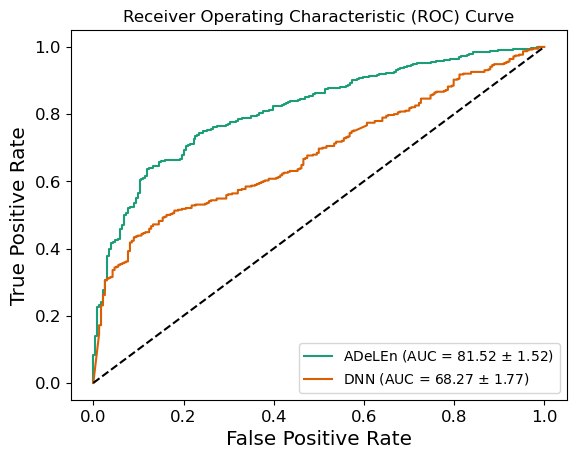

In [7]:
# colorblind friendly colors
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']

plt.plot(adelen_fpr, adelen_tpr, label=f'ADeLEn (AUC = %0.2f $\pm$ %0.2f)' % (roc_adelen.mean().values[0]*100, roc_adelen.std().values[0]*100), color=colors[0])
plt.plot(supervised_fpr, supervised_tpr, label=f'DNN (AUC = %0.2f $\pm$ %0.2f)' % (roc_supervised.mean().values[0]*100, roc_supervised.std().values[0]*100), color=colors[1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize='x-large')
plt.ylabel('True Positive Rate', fontsize='x-large')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize='large')
plt.legend(loc="lower right")
# ticks larger
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

plt.savefig("roc_curve.pdf", bbox_inches='tight')

plt.show()